In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt

In [2]:
path = ''
image_path = os.path.join(path, './data/CameraRGB/')
mask_path = os.path.join(path, './data/CameraMask/')
image_list = [os.path.join(image_path, fname) for fname in os.listdir(image_path)]
mask_list = [os.path.join(mask_path, fname) for fname in os.listdir(mask_path)]

Text(0.5, 1.0, 'Segmentation')

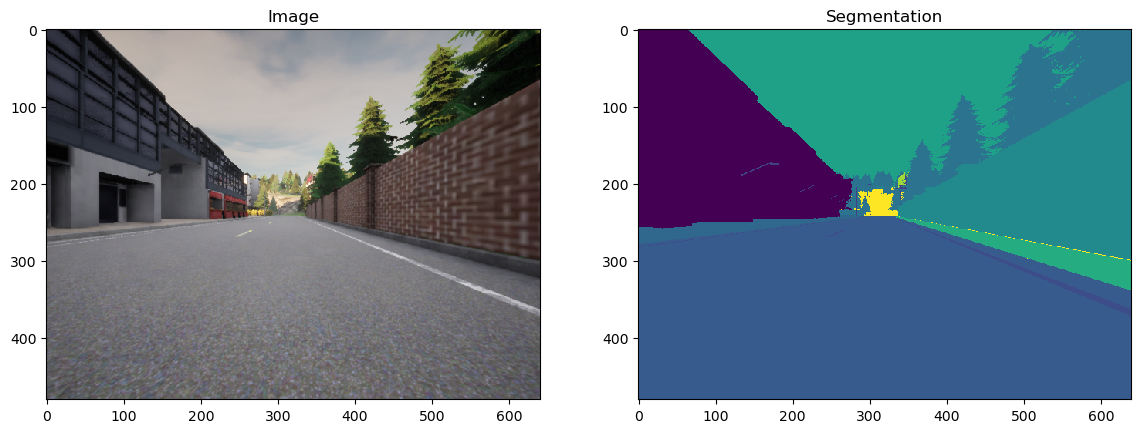

In [3]:
N = 2
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])
fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask[:, :, 0])
arr[1].set_title('Segmentation')

In [4]:
class CustomDataset(Dataset):
    def __init__ (self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__ (self):
        return len(self.image_paths)
    
    def __getitem__ (self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_pathsp[idx]
        img = imageio.imread(img_path)
        mask = imageio.imread(mask_path)[:, :, 0]
        if self.transform:
            img, mask = self.transform(img, mask)
        return img, mask
    
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((96, 128))])

dataset = CustomDataset(image_list, mask_list, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)